In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


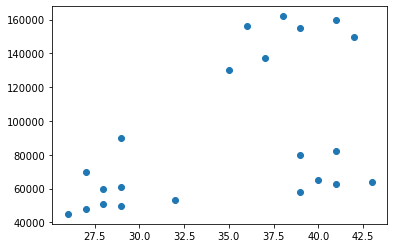

In [11]:
# scatterplot
plt.scatter(df['Age'],df['Income($)'])

# we can easily see that there can be 3 clusters

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
# here we are going to fit and predict the dataframe excluding the name column because name column is string and its not gonna 
# to be useful
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [14]:
# we are going to append the cluster column to the dataframe
df['cluster'] = y_predicted
df.head()

# here Rob is come in cluster 2, Mohan is come in cluster 1 and kory is come in cluster 0

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No handles with labels found to put in legend.


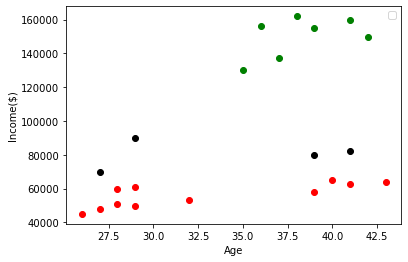

In [15]:
# now we need to seperate this 3 clusters into 3 different dataframes
# now we have 3 different dataframe each belong to 1 cluster and I want to plot these 3 dataframes onto one scatterplot

df1 = df[df.cluster==0]  # this df1 dataframe belongs to cluster 0
df2 = df[df.cluster==1]  # cluster 1
df3 = df[df.cluster==2]  # cluster 2

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='Red')
plt.scatter(df3.Age,df3['Income($)'],color='Black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# In our Scatterplot there is some misclassification , there has problem with below two clusters it happpen because our 
# scaling is not right our y axis is scale from 40000 to 160000 and the range of x axis is pretty narrow see its like hardly
# 20 vs in y axis is 160000 so when dont scale your features properly you might get into this problem that why we need to do
# some preprocessing and use MinMaxScaler so scale this two features and then only we can run our algorithm

In [19]:
# now we are going to use MinMaxScaler
# so my MinMaxScaler will try to make the scale 0 to 1 so after done with my scaling I will have a scale of 0 to 1 on y and 
# as well as my x axis

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [20]:
# use KMeans algorithm once again to train our scale our dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_predicted
df

# this is my new clustering result

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


No handles with labels found to put in legend.


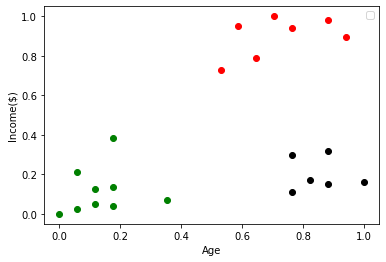

In [22]:
# lets plot the scatterplot again
df1 = df[df.cluster==0]  
df2 = df[df.cluster==1]  
df3 = df[df.cluster==2]  

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='Red')
plt.scatter(df3.Age,df3['Income($)'],color='Black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# now you can see that I have pretty good clusters 

In [23]:
# if you look at km which is your train KMeans model that has a variable call cluster_centers
km.cluster_centers_

# these centers are besically your centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

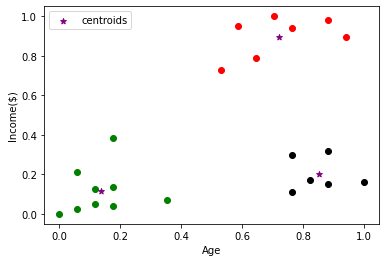

In [24]:
# If you can plot these centroids in your scatterplot it can give a nice visualization to us
df1 = df[df.cluster==0]  
df2 = df[df.cluster==1]  
df3 = df[df.cluster==2]  

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='Red')
plt.scatter(df3.Age,df3['Income($)'],color='Black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color=['purple'],marker='*',label='centroids')
# here km.cluster_centers_[:,0] so this my x and using this syntax you can say I want to go through all the rows which is 3 rows
# here (see above km.center_centers_ code) and then the 0 means 1st column (see above code) and 
# km.cluster_centers_[:,1] this is my y your are a 1st column

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [26]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
# here we define k range 1 to 10 and then sum of square error is an array([]) so for k=1 you will find sse and k=2 you will
# find sse you will store all of that into this array then use matplotlib plot to plot the result.
# so after that I am just going through 1 to 9 and then each iteration I create a new model with clusters=k and then I call 
# fit and I try fit my dataframe ['Age','Income($)']. 
# so now what is my sum of square errors how do I get that when you call km.fit after that on your kmeans there is a 
# parameter called inertia that will give you the sum of square error and that error we want to just append it to our array
# that we have.

In [28]:
sse
  
# so you can see that sum of square is very high initially then it can turn.

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.22395807059250125,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

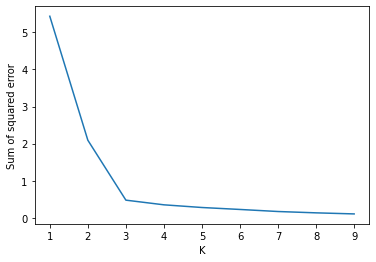

In [29]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# here you get elbow plot and you can see that k=3 for my elbow